In [2]:
import geopandas as gpd
from shapely.geometry import Polygon

<AxesSubplot:>

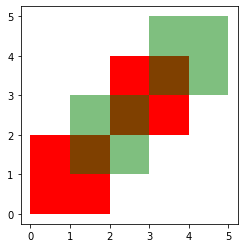

In [6]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                        Polygon([(2,2), (4,2), (4,4), (2,4)])])

polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                        Polygon([(3,3), (5,3), (5,5), (3,5)])])

df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})
ax = df1.plot(color='red')
df2.plot(ax=ax, color='green', alpha=0.5)

In [10]:
res_union = df1.overlay(df2, how='union')
res_union.geometry

0    POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....
1    POLYGON ((3.00000 2.00000, 2.00000 2.00000, 2....
2    POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4....
3    POLYGON ((2.00000 1.00000, 2.00000 0.00000, 0....
4    MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000...
5    MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000...
6    POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5....
Name: geometry, dtype: geometry

<AxesSubplot:>

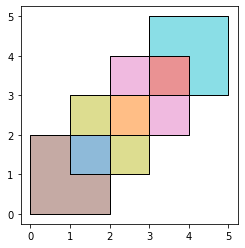

In [5]:
ax = res_union.plot(alpha=0.5, cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [11]:
res_intersection = df1.overlay(df2, how='intersection')
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2...."
1,2,1,"POLYGON ((3.00000 2.00000, 2.00000 2.00000, 2...."
2,2,2,"POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4...."


<AxesSubplot:>

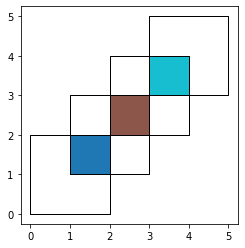

In [12]:
ax = res_intersection.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [13]:
res_symdiff = df1.overlay(df2, how='symmetric_difference')
res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2.00000 1.00000, 2.00000 0.00000, 0...."
1,2.0,NaN,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000..."
2,NaN,1.0,"MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000..."
3,NaN,2.0,"POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5...."


<AxesSubplot:>

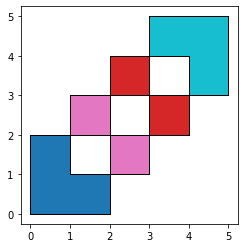

In [14]:
ax = res_symdiff.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [15]:
res_difference = df1.overlay(df2, how='difference')
res_difference

,geometry,df1
0,"POLYGON ((2.00000 1.00000, 2.00000 0.00000, 0....",1
1,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000...",2


<AxesSubplot:>

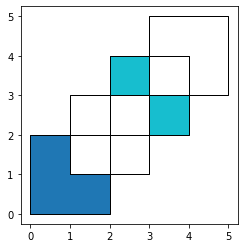

In [16]:
ax = res_difference.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')